<a href="https://colab.research.google.com/github/YashviKommidi/ML-project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION**
---

---



Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Diabetes doubles your risk of heart disease and stroke.
In this generation, everyone are being effected by this disease, so there is a need for predicting Diabates more conveniently.
So with the help of different parameters a model for predicting Diabetes in women is developed based on paramters below:


1. Pregnancies
2. Glucose
3. Blood Pressure
4. Skin Thickness
5. Insulin 
6. BMI 
7. Diabetes Pedigree Function
8. Age 

By using SVM algorithm, a model is trained which gives an output either 0 or 1 based on the parameters, predicting that human has diabetes or not.
THe Dataset used is [PIMA DATASET](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

**WORK FLOW:**

**DATA-----> DATA PREPROCESSING-----> TRAIN TEST SPLIT-----> SVM**

**NEW SET-------> TRAINED SUPPORT VECTOR MACHINE CLASSIFIER--------> DIABETCIS OR NON-DIABETIC PREDICTION**

# **About Diabetes** **Prediction**

This model comes under *Health-Care* Domain.

For creating a model which can predict whether a female is having diabetes or not, we have taken a dataset which includes different parameters like age, glucose, Pregnancies, BP ,etc. then using *train_test_split*, given data is divided into training dataset and testing data set in the ratio of 80:20

* Then Data cleaning is done, means removing empty cells, or filling with mean values, checking the data is in a proper order or not.

* Using matplotlib.pyplot and seaborn data visualisation is done 

* Then data is standardised and divided the data and outcomes into X and Y

* using SVC model is trained and then the model evaluation done by knowing the accuracy score.

* In *Hyper parameter Tuning*, using GridSearchCV found best paramter in the view of accuracy and then built a model with the new parameter 

Finally, a predcitive system is created 
with the help of this doctors can predict whether a female is having diabetes or not easily and with high accuracy.
These can be used in hospitals for better prediction. 





# **IMPORTING LIBRARIES (DEPENDENCIES)**

In [1]:
import numpy as np # for numpy arrays 
import pandas as pd # for creating dataframes 
import matplotlib.pyplot as plt # for plotting of data 
import seaborn as sns #for visualisation of data 
from sklearn.preprocessing import StandardScaler # for standardising data 
from sklearn.model_selection import train_test_split # for splitting dataset into train and test sets 
from sklearn import svm
from sklearn.metrics import accuracy_score # for getting accuracy score

In [2]:
print(pd.__version__)

1.1.5


In [62]:
print(np.__version__)

1.19.5


In [64]:
print(sns.__version__)

0.11.1


# **DATA COLLECTION AND ANALYSIS**

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv') 

In [4]:
# printing the first 10 rows of the dataset
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print(diabetes_dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


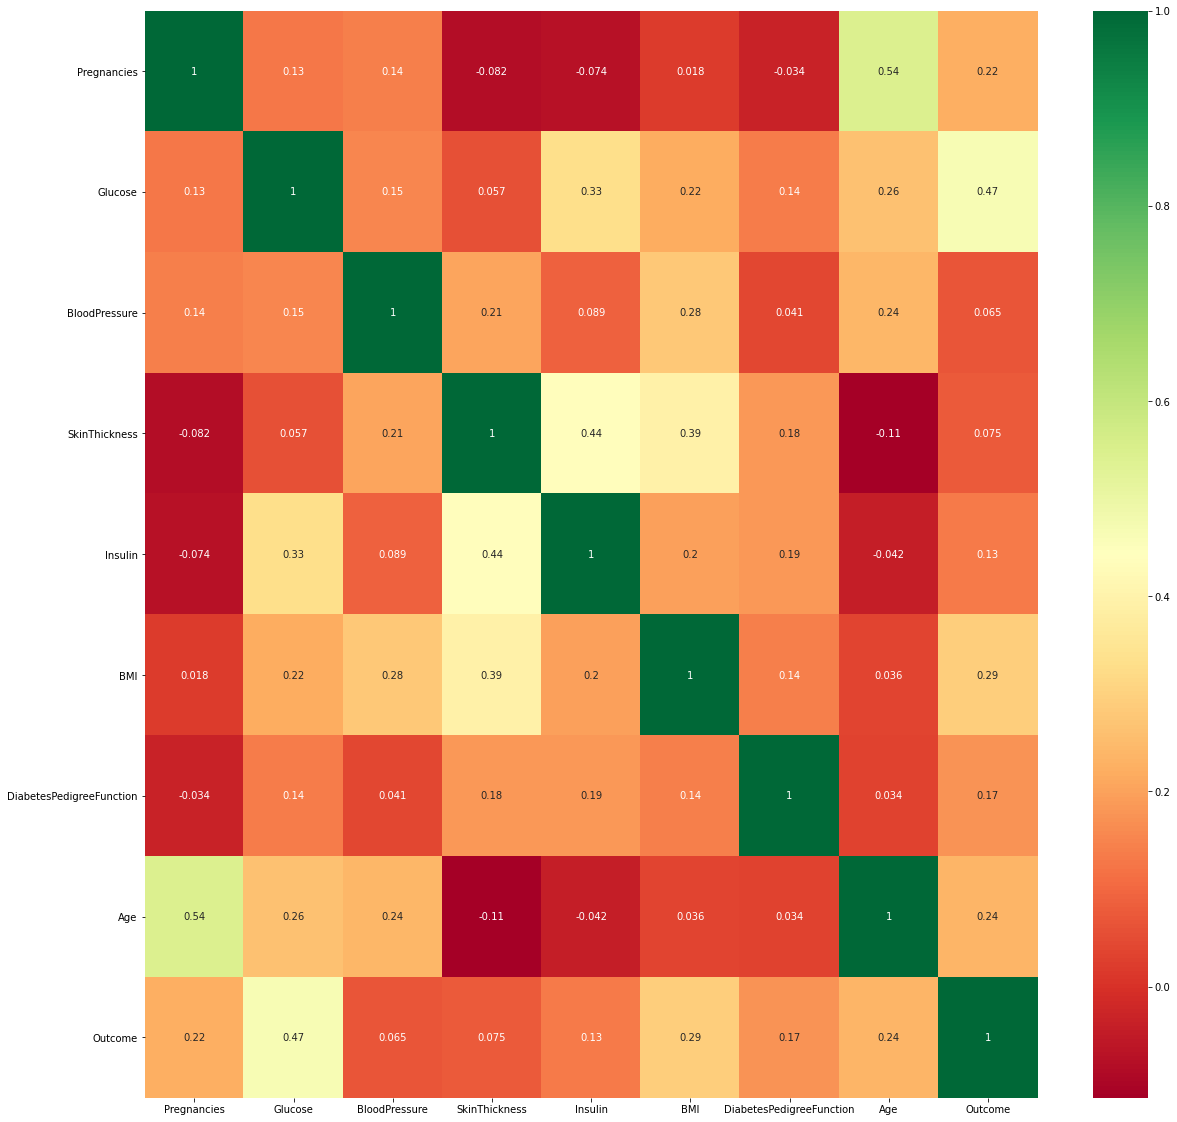

In [7]:
corrmat = diabetes_dataset.corr()
top_corr_feautures = corrmat.index
plt.figure(figsize= (20,20))
#plot heat map 
g= sns.heatmap(diabetes_dataset[top_corr_feautures].corr(),annot=True, cmap="RdYlGn")

In [8]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [9]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

OUTCOMES MEANING

0 --> Non-Diabetic

1 --> Diabetic

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **PLOTTING**

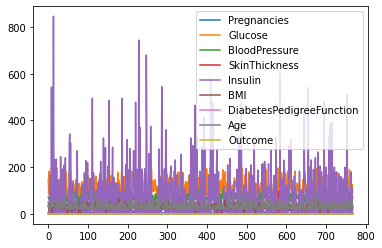

In [15]:
diabetes_dataset.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


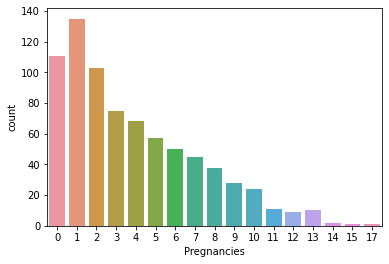

In [16]:
sns.countplot(diabetes_dataset['Pregnancies'])

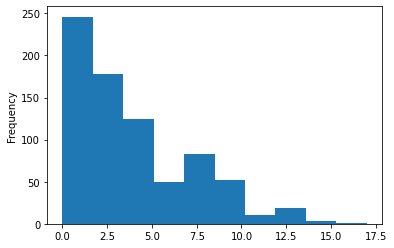

In [17]:
diabetes_dataset["Pregnancies"].plot(kind = 'hist')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


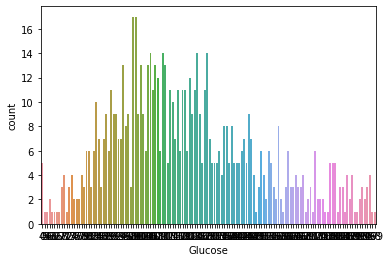

In [18]:
sns.countplot(diabetes_dataset['Glucose'])

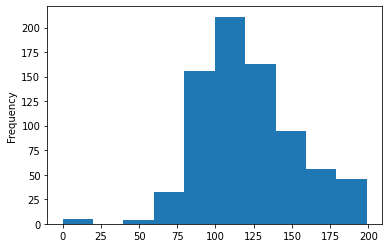

In [19]:
diabetes_dataset["Glucose"].plot(kind = 'hist')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


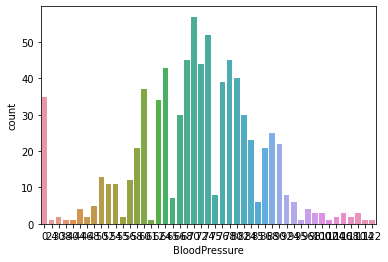

In [20]:
sns.countplot(diabetes_dataset['BloodPressure'])

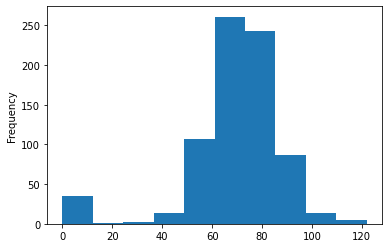

In [21]:
diabetes_dataset["BloodPressure"].plot(kind = 'hist')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


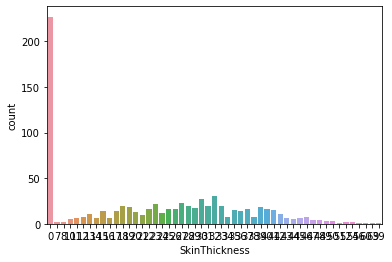

In [22]:
sns.countplot(diabetes_dataset['SkinThickness'])

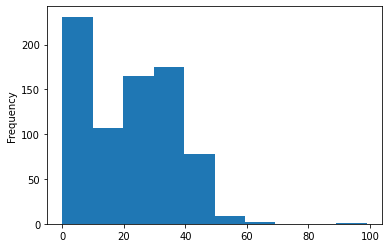

In [23]:
diabetes_dataset["SkinThickness"].plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


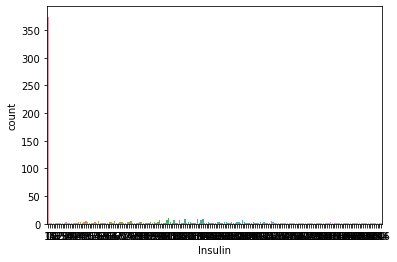

In [24]:
sns.countplot(diabetes_dataset['Insulin'])

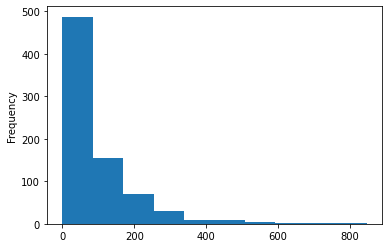

In [25]:
diabetes_dataset["Insulin"].plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


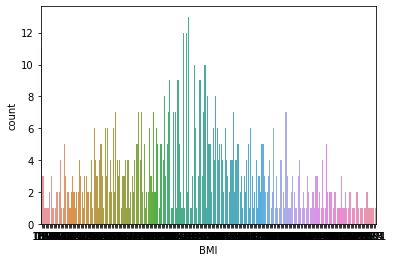

In [26]:
sns.countplot(diabetes_dataset['BMI'])

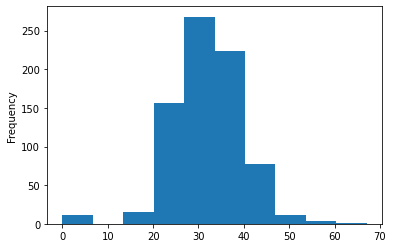

In [27]:
diabetes_dataset["BMI"].plot(kind = 'hist')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


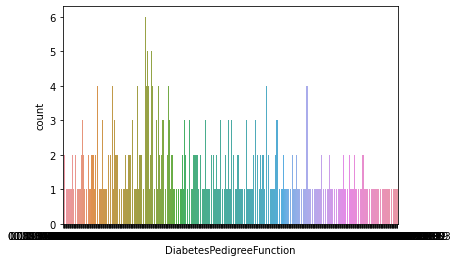

In [28]:
sns.countplot(diabetes_dataset['DiabetesPedigreeFunction'])

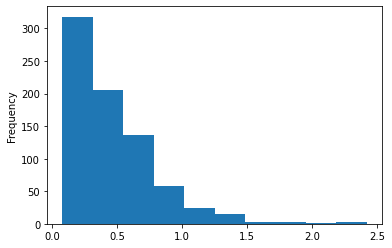

In [29]:
diabetes_dataset["DiabetesPedigreeFunction"].plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


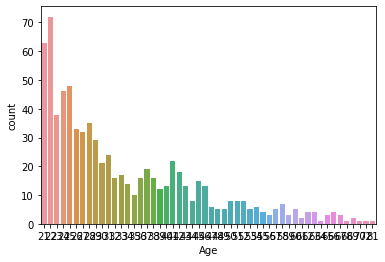

In [30]:
sns.countplot(diabetes_dataset['Age'])

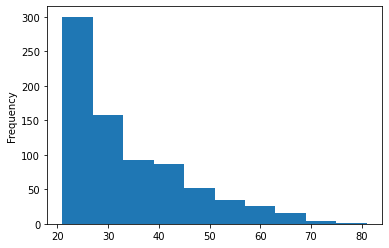

In [31]:
diabetes_dataset["Age"].plot(kind = 'hist')


# **DATA STANDARDISATION**

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
standardized_data = scaler.transform(X)

In [35]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [36]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [37]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **SPLITTING OF DATA SET INTO TRAIN AND TEST - TRAIN TEST SPLIT**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=5)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **TRAINING THE MODEL**

In [40]:
classifier = svm.SVC(kernel='linear')

In [41]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **MODEL EVALUATION**

**ACCURACY SCORE**

In [42]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7964169381107492


In [44]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


#  **HYPER PARAMETER TUNING**

* Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

* Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

* Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results.



In [46]:
from sklearn.svm import SVC

In [47]:
model= SVC()

In [48]:
kernel = ['linear', 'rbf', 'poly']
for i in kernel:
  model= SVC(kernel=i, C=1.0)
  model.fit(X_train, Y_train)
  print('for kernel : ', i)
  print('Accuracy is :', model.score(X_test,Y_test))

for kernel :  linear
Accuracy is : 0.7532467532467533
for kernel :  rbf
Accuracy is : 0.7337662337662337
for kernel :  poly
Accuracy is : 0.7662337662337663


In [49]:
model= SVC()
model.fit(X_train, Y_train)
print("accuracy in Training data: ", model.score(X_train,Y_train))
print("accuracy in Testing data: ", model.score(X_test,Y_test))

accuracy in Training data:  0.8257328990228013
accuracy in Testing data:  0.7337662337662337


In [50]:
kernel = ['linear', 'rbf', 'poly','sigmoid']
for i in kernel:
  model= SVC(kernel=i, C=1.0)
  model.fit(X_train, Y_train)
  print('for kernel : ', i)
  print('Accuracy is :', model.score(X_test,Y_test))

for kernel :  linear
Accuracy is : 0.7532467532467533
for kernel :  rbf
Accuracy is : 0.7337662337662337
for kernel :  poly
Accuracy is : 0.7662337662337663
for kernel :  sigmoid
Accuracy is : 0.7012987012987013


In [51]:
for i in range(1, 10):
  model=SVC(kernel='poly',degree=i,C=100)
  model.fit(X_train, Y_train)
  print("accuracy in Training data: ", model.score(X_train,Y_train))
  print("accuracy in Testing data:  ", model.score(X_test,Y_test))

accuracy in Training data:  0.7947882736156352
accuracy in Testing data:   0.7597402597402597
accuracy in Training data:  0.7328990228013029
accuracy in Testing data:   0.6818181818181818
accuracy in Training data:  0.8599348534201955
accuracy in Testing data:   0.7467532467532467
accuracy in Training data:  0.9169381107491856
accuracy in Testing data:   0.6623376623376623
accuracy in Training data:  0.9381107491856677
accuracy in Testing data:   0.6948051948051948
accuracy in Training data:  0.9315960912052117
accuracy in Testing data:   0.6948051948051948
accuracy in Training data:  0.9218241042345277
accuracy in Testing data:   0.7012987012987013
accuracy in Training data:  0.9104234527687296
accuracy in Testing data:   0.7012987012987013
accuracy in Training data:  0.9039087947882736
accuracy in Testing data:   0.7272727272727273


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,100,1000], 'kernel' : ['linear', 'rbf','sigmoid','poly'], 'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(), param_grid)
grid.fit(X_train, Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
print(grid.best_params_)
print(grid.score(X_test,Y_test))

{'C': 1, 'degree': 1, 'kernel': 'poly'}
0.7597402597402597


In [54]:
grid.best_score_

0.775223244035719

In [55]:
classifier = svm.SVC(kernel='poly')

In [56]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7996742671009772


In [59]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


# **MAKING A PREDCITIVE SYSTEM**

In [61]:
input_data = (2,197,70,45,543,30.5,0.158,53)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]
[1]
The person is diabetic
